In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [32]:
df.shape

(1338, 7)

In [33]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 600x600 with 0 Axes>

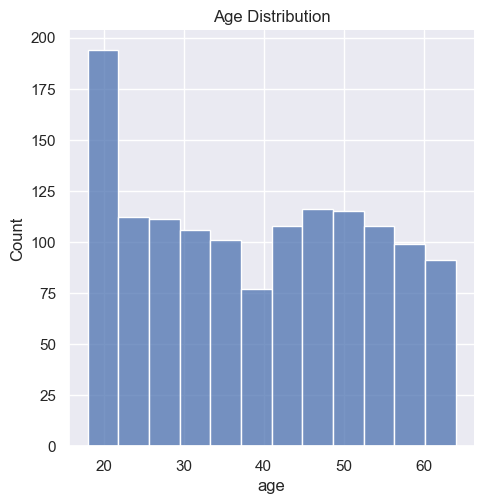

In [36]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

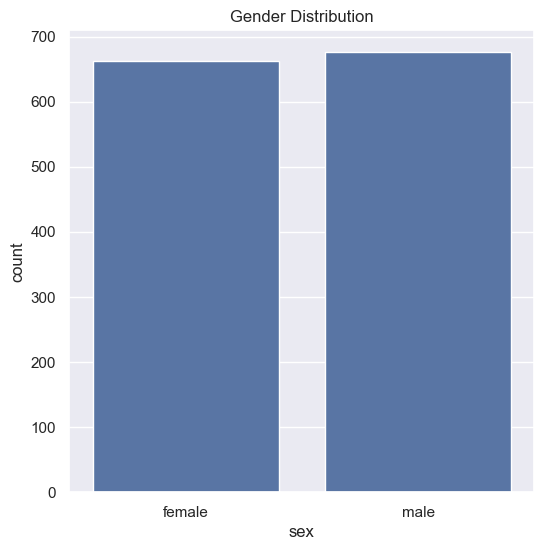

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

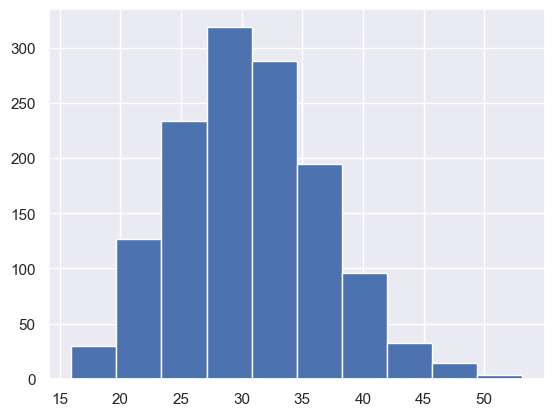

In [38]:
plt.hist(df['bmi'])
plt.show()

<Figure size 600x600 with 0 Axes>

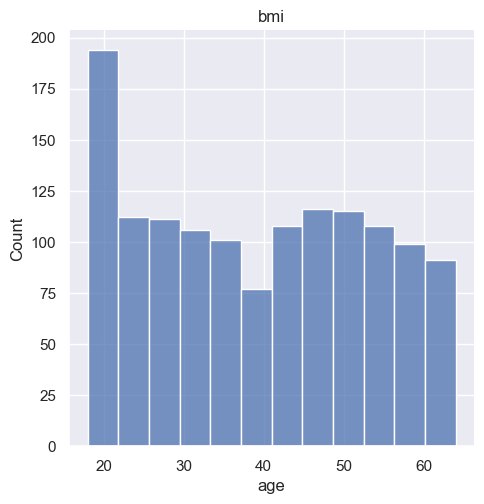

In [39]:
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('bmi')
plt.show()

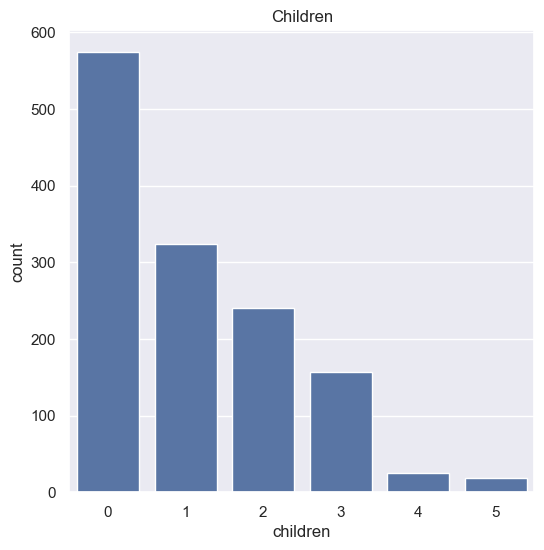

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

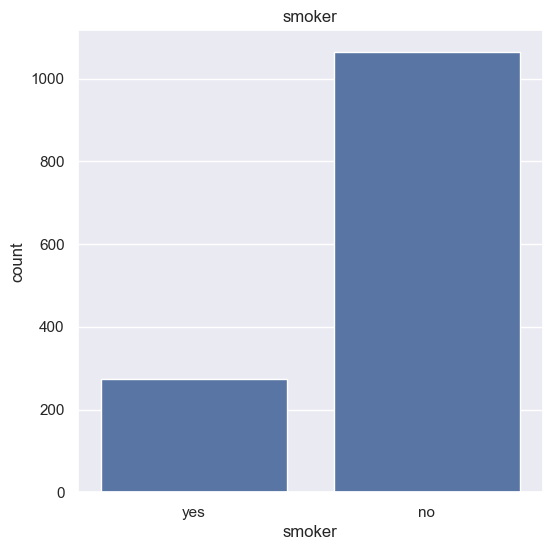

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

# Encoding the categorical features

In [42]:
#Encoding the sex column 
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding the smoker column
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)

#Encoding the region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [43]:
X= df.drop(columns='charges',axis=1)
Y=df['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [44]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [46]:
# loading the Linear Regression model
reg = LinearRegression()

In [47]:
reg.fit(X_train, Y_train)

LinearRegression()

In [48]:
training_data_prediction =reg.predict(X_train)
print(training_data_prediction)

[35246.21264778 31547.40223965 28768.59671464 ... 27655.82389811
 14998.28180557  5607.75031074]


In [49]:
# R squared value
R2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', R2_train)

R squared vale :  0.7684020098208507


In [50]:
#prediction on the test data
test_data_prediction=reg.predict(X_test)
print(test_data_prediction)

[ 5.31881450e+03  3.22552895e+04  6.52809943e+03  9.64324136e+03
  1.33410124e+04  3.06583922e+04  3.63741512e+04  3.32526355e+04
  3.10770532e+04  7.35708791e+03  1.23682752e+04  3.12478738e+04
  1.42763846e+04  2.73729555e+04  3.13734068e+04  7.99852931e+03
  8.09925770e+03  3.72701316e+03  2.92050205e+04  8.77055626e+03
  8.44079172e+03  1.47348151e+04  5.05554666e+03  1.01295667e+04
  5.01002494e+03  9.54647246e+03  3.08180835e+04  7.90223714e+03
  1.40508056e+04  4.35437745e+03  9.25203822e+03  9.91139369e+03
  1.23054536e+04  4.42286194e+03  8.50068132e+03  8.53177137e+03
  3.66162517e+04  1.07413263e+04  1.53675772e+03  4.06336069e+03
  1.47598330e+03  7.31079894e+03  3.35345706e+04  9.11578680e+03
  6.58134094e+03  1.28901914e+04  1.05196680e+04  5.34623853e+03
  1.41794973e+04  6.97139936e+03  1.36747820e+04 -9.10813083e+02
  1.08032434e+04  7.70200479e+03  8.86405130e+03  4.08668142e+04
  8.66532834e+02  2.83861450e+04  1.02047467e+04  1.25295795e+04
  4.41941246e+03  8.16366

In [51]:
#R-Squared Value
R2_test=metrics.r2_score(Y_test,test_data_prediction)
print(R2_test)

0.6538000900543681


In [52]:
input_data = (31,1,25.74,0,1,0)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = reg.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', prediction[0])

[28516.13534413]
The insurance cost is USD  28516.13534413206


C:\Users\arana\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
import pickle

# Save the trained model to a .pkl file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(reg, file)